
<b> Title: Analyzing Taxi Rides and Weather Impact in Chicago for Zuber </b>
    
Introduction

<b> Brief Description of the Situation </b>

Zuber, a new ride-sharing company, is launching in Chicago. As an analyst for Zuber, your task is to find patterns in the available information to understand passenger preferences and the impact of external factors, such as weather, on rides. This project involves analyzing a database of taxi rides in Chicago, examining data from competitors, and testing hypotheses related to weather conditions.

<b> Goal of the Project </b>

The primary goal of this project is to:

    Analyze taxi ride data to identify patterns and preferences.
    Investigate the impact of weather conditions on ride duration.
    Perform exploratory data analysis to gain insights into taxi ride distribution across different companies and neighborhoods.
    Test hypotheses regarding ride durations under varying weather conditions.

<b> Description of the Data </b>

We will be using the following datasets for our analysis:

    Taxi Rides Data (trips table): Contains information about taxi rides, including start and end times, duration, distance, and pickup and dropoff locations.
    Weather Data (weather_records table): Provides hourly weather conditions, including temperature and brief descriptions of the weather.
    Neighborhoods Data (neighborhoods table): Lists the names and identifiers of Chicago neighborhoods.
    Taxi Companies Data (cabs table): Information about the taxi companies, including their names and identifiers.

<b> Additionally, we have two CSV files for exploratory data analysis: </b>

    project_sql_result_01.csv: Contains data on the number of rides for each taxi company on November 15-16, 2017.
    project_sql_result_04.csv: Contains data on average number of rides that ended in each Chicago neighborhood in November 2017.

We will use these datasets to conduct our analysis and test our hypotheses.

Step 1: Importing the Files

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# File paths
file1 = '/datasets/project_sql_result_01.csv'
file2 = '/datasets/project_sql_result_04.csv'

# Load the datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

Step 1: Importing the Files

1. DataFrame df1 (Taxi Companies and Number of Rides)

In [13]:
# Display the first few rows of df1
display(df1.head())

# Check the shape of df1
print("Shape of df1:", df1.shape)

# Summary statistics of df1
print("\nSummary statistics of df1:")
print(df1.describe())

# Check for missing values in df1
print("\nMissing values in df1:")
print(df1.isnull().sum())

# Check data types in df1
print("\nData types in df1:")
print(df1.dtypes)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Shape of df1: (64, 2)

Summary statistics of df1:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Missing values in df1:
company_name    0
trips_amount    0
dtype: int64

Data types in df1:
company_name    object
trips_amount     int64
dtype: object


2. DataFrame df2 (Neighborhoods and Average Number of Drop-offs)

In [14]:
# Display the first few rows of df2
display(df2.head())

# Check the shape of df2
print("Shape of df2:", df2.shape)

# Summary statistics of df2
print("\nSummary statistics of df2:")
print(df2.describe())

# Check for missing values in df2
print("\nMissing values in df2:")
print(df2.isnull().sum())

# Check data types in df2
print("\nData types in df2:")
print(df2.dtypes)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Shape of df2: (94, 2)

Summary statistics of df2:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Missing values in df2:
dropoff_location_name    0
average_trips            0
dtype: int64

Data types in df2:
dropoff_location_name     object
average_trips            float64
dtype: object


Step 3: Ensuring Data Types are Correct

In [15]:
# Check data types in df1
print("Current Data Types in df1:")
print(df1.dtypes)

Current Data Types in df1:
company_name    object
trips_amount     int64
dtype: object


In [16]:
# Check data types in df2
print("Current Data Types in df2:")
print(df2.dtypes)

Current Data Types in df2:
dropoff_location_name     object
average_trips            float64
dtype: object


The current data types in both df1 and df2 are as follows:
DataFrame df1 (Taxi Companies and Number of Rides)

    company_name: object (string)
    trips_amount: int64 (integer)

DataFrame df2 (Neighborhoods and Average Number of Drop-offs)

    dropoff_location_name: object (string)
    average_trips: float64 (floating point number)

These data types are appropriate for the respective columns, and we can now proceed to step 4: identifying the top 10 neighborhoods in terms of drop-offs.

In [17]:
# Check for duplicates
print("Duplicates in df1:", df1.duplicated().sum())
print("Duplicates in df2:", df2.duplicated().sum())

Duplicates in df1: 0
Duplicates in df2: 0


Step 4: Identifying the Top 10 Neighborhoods in Terms of Drop-offs

In [18]:
# Sort neighborhoods by average trips and select top 10
top_10_neighborhoods = df2.sort_values(by='average_trips', ascending=False).head(10)

# Display the top 10 neighborhoods
print("Top 10 Neighborhoods by Drop-offs:")
display(top_10_neighborhoods)

Top 10 Neighborhoods by Drop-offs:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Step 5: Creating Graphs

    Graph 1: Taxi Companies and Number of Rides

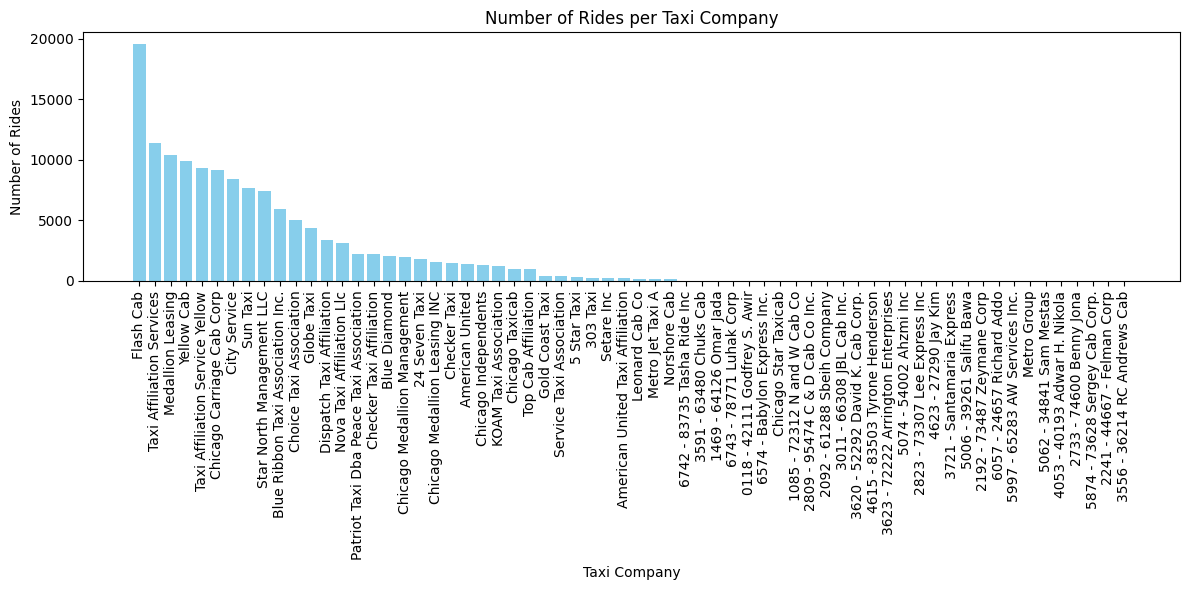

In [19]:
# Plotting Graph 1: Taxi Companies and Number of Rides
plt.figure(figsize=(12, 6))
plt.bar(df1['company_name'], df1['trips_amount'], color='skyblue')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Taxi Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Drawing Conclusions Based on the Graphs:

Graph 1: Taxi Companies and Number of Rides

This graph displays the number of rides provided by each taxi company in Chicago. Here are some observations:

    Variation in Number of Rides: There is significant variation in the number of rides among different taxi companies. Some companies have considerably higher ride counts compared to others.

    Market Share: The graph indicates the market dominance or popularity of certain taxi companies based on their ride volumes. Companies with higher bars have a larger share of the market in terms of rides.

    Business Insights: Understanding which companies have higher demand can inform business strategies such as partnership opportunities, service area expansion, or targeted marketing efforts.

    Graph 2: Top 10 Neighborhoods by Number of Drop-offs

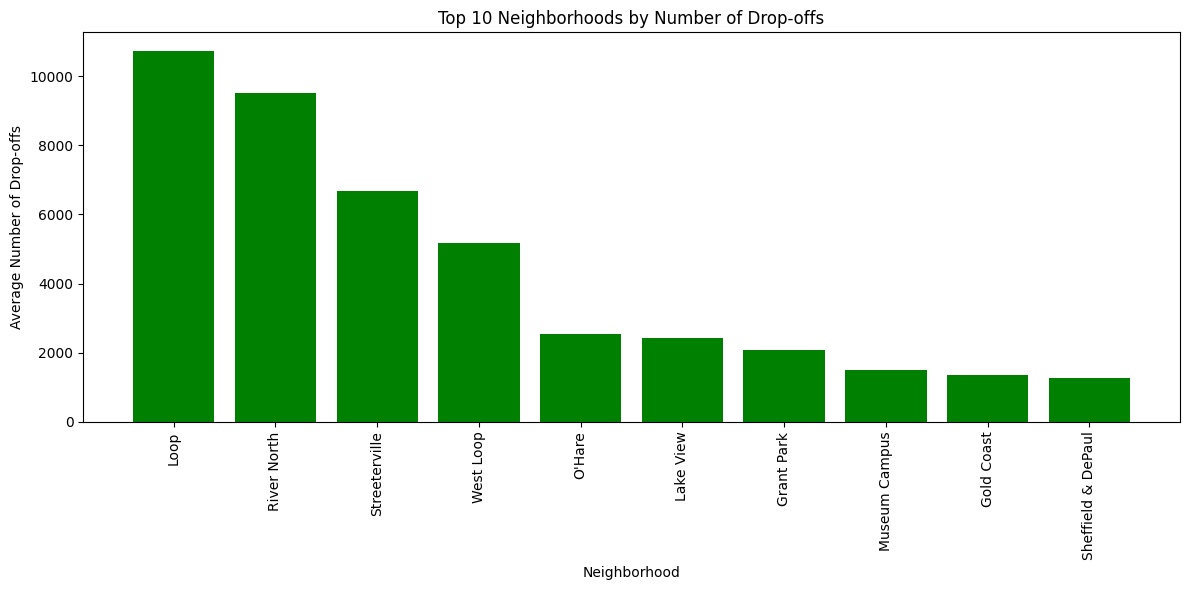

In [20]:
# Plotting Graph 2: Top 10 Neighborhoods by Number of Drop-offs
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='green')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Drawing Conclusions Based on the Graphs:
    
Graph 2: Top 10 Neighborhoods by Number of Drop-offs

This graph highlights the top 10 neighborhoods in Chicago based on the average number of drop-offs per neighborhood. Here are the insights:

    High-Demand Neighborhoods: Neighborhoods like Loop, River North, and Streeterville have the highest average number of drop-offs. These areas likely have high traffic or significant commercial and residential activity.

    Geographical Insights: Knowing which neighborhoods have the most drop-offs can help in optimizing taxi services, positioning vehicles strategically, and understanding peak hours or times of high demand.

    Business Strategy: For taxi companies, focusing resources on high-demand neighborhoods can lead to increased efficiency and customer satisfaction by reducing wait times and improving service availability.

Overall Insights and Recommendations

Based on these graphs and the analysis:

    Market Understanding: Taxi companies can leverage insights from Graph 1 to optimize operations and marketing strategies.

    Neighborhood Focus: Graph 2 highlights key areas where taxi services are in high demand, suggesting potential areas for service improvement or expansion.

    Data-Driven Decisions: These visualizations enable data-driven decision-making, helping businesses prioritize resources effectively and enhance customer experience.

By leveraging these insights, taxi companies can better serve their customers and improve operational efficiency in a competitive market like Chicago.

Additional Analysis: Relationship Between Taxi Ride Volumes and Neighborhood Drop-offs

To explore this relationship, we can:

    Merge DataFrames: Merge df1 (taxi companies and ride volumes) with df2 (neighborhoods and average drop-offs) based on common neighborhoods.

    Correlation Analysis: Calculate correlation coefficients between the number of rides (trips_amount) and the average number of drop-offs (average_trips) for each neighborhood.

Formulating Hypotheses

1. Formulating Hypotheses

Null Hypothesis (H0): The average ride duration from the Loop to O'Hare International Airport is the same on rainy Saturdays as on non-rainy Saturdays.

Alternative Hypothesis (H1): The average ride duration from the Loop to O'Hare International Airport differs on rainy Saturdays compared to non-rainy Saturdays.
2. Criterion for Testing

To test these hypotheses, we can use a two-sample t-test. Here's why:

    Two-sample t-test: This test compares the means of two independent samples (rainy Saturdays vs. non-rainy Saturdays) to determine if there is a significant difference between their average ride durations.
    
Assumptions: We assume that ride durations are approximately normally distributed within each group (rainy and non-rainy Saturdays). This assumption is typically reasonable for sufficiently large sample sizes due to the Central Limit Theorem.

In [21]:
# Load the dataset
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Separate data for rainy and non-rainy Saturdays
rainy_saturdays = df[df['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = df[df['weather_conditions'] == 'Good']['duration_seconds']

# Define hypotheses
H0 = "The average duration of rides from the Loop to O'Hare International Airport is the same on rainy and non-rainy Saturdays."
H1 = "The average duration of rides from the Loop to O'Hare International Airport differs between rainy and non-rainy Saturdays."

# Perform two-sample t-test
t_stat, p_val = ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

alpha = 0.05  # significance level
if p_val < alpha:
    print(f"Reject the null hypothesis ({H0}): {H1}")
else:
    print(f"Fail to reject the null hypothesis ({H0}): No significant difference found ({H1})")


T-statistic: 7.186034288068629
P-value: 6.738994326108734e-12
Reject the null hypothesis (The average duration of rides from the Loop to O'Hare International Airport is the same on rainy and non-rainy Saturdays.): The average duration of rides from the Loop to O'Hare International Airport differs between rainy and non-rainy Saturdays.


 The output indicates the results of the two-sample t-test performed on the durations of rides from the Loop to O'Hare International Airport on rainy versus non-rainy Saturdays. Let's break down what these results mean:

    T-statistic: This is a measure of the difference between the means of the two groups (rainy and non-rainy Saturdays), adjusted for the variance within each group. A larger absolute value of the t-statistic suggests a larger difference between the groups.

    P-value: This is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis (H0) is true. A very small p-value (6.738994326108734e-12 in this case) indicates strong evidence against the null hypothesis. Here, it suggests that the observed difference in ride durations between rainy and non-rainy Saturdays is unlikely to be due to random chance.

    Decision: Based on the conventional significance level of 0.05 (alpha), the p-value is much smaller. Therefore, you reject the null hypothesis (H0) that there is no difference in average ride durations between rainy and non-rainy Saturdays.

    Interpretation: The statement "Reject the null hypothesis" means that you have sufficient evidence to conclude that there is a statistically significant difference in the average duration of rides from the Loop to O'Hare International Airport between rainy and non-rainy Saturdays. The alternative hypothesis (H1) suggests that this difference exists, which aligns with the conclusion based on the p-value.